In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.model_selection import StratifiedKFold
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
from Orange.evaluation import compute_CD, graph_ranks
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [94]:
static_voting = pd.read_csv("static_voting_full_results.csv")
static_regressors = pd.read_csv("static_regressors_full_results.csv")

single_voting = pd.read_csv("single_voting_full_results.csv")
single_regressors = pd.read_csv("single_regressors_full_results.csv")

In [95]:
def compare_results(results, lst_models):      
        fried_result = friedmanchisquare(*results)
        
        ranks = np.array([rankdata(-p) for p in results])
        
        # Calculating the average ranks.
        average_ranks = np.mean(ranks, axis=0)

        names = [lst_models[i] + ' - ' + str(round(average_ranks[i], 3)) for i in range(len(average_ranks))]
        
        # This method computes the critical difference for Nemenyi test with alpha=0.1.
        # For some reason, this method only accepts alpha='0.05' or alpha='0.1'.
        cd = compute_CD(average_ranks, n=len(results),alpha='0.05', test='nemenyi')
        
        return fried_result, ranks, names, cd, average_ranks

In [96]:
def plot_comparisons(fried_result, names, cd, average_ranks):    
    # This method generates the plot.
    graph_ranks(average_ranks, names=names,
                        cd=cd, width=10, textspace=1.5)
        
    plt.title(f'Friedman-Nemenyi={round(fried_result.pvalue, 4)}\nCD={round(cd, 3)}')
    plt.show()
    
    return

#### Critical Diagram - Single Regressors 

In [97]:
names = ['KNeighborsRegressor', 'LinearRegression', 'Ridge', 'LinearSVR', 
         'DecisionTreeRegressor', 'Lasso']

dct_results = {}

for n in names:
    res = single_regressors[single_regressors.name == n].r2.to_list()
    dct_results[n] = res

results = np.c_[dct_results['KNeighborsRegressor'], dct_results['LinearRegression'], dct_results['Ridge'], 
                dct_results['LinearSVR'], dct_results['DecisionTreeRegressor'], dct_results['Lasso']]

fried_result, ranks, names, cd, average_ranks = compare_results(results, names)

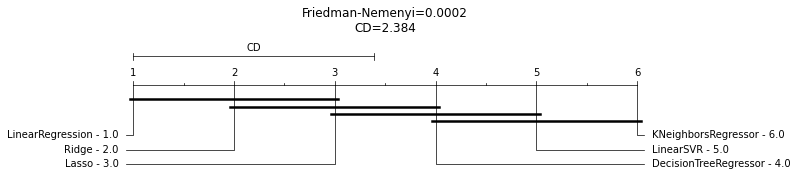

In [98]:
plot_comparisons(fried_result, names, cd, average_ranks)

#### Critical Diagram - Static Regressors 

In [99]:
names = ['CatBoostRegressor', 'XGBRegressor', 'LGBMRegressor', 'GradientBoostingRegressor', 
         'RandomForestRegressor', 'ExtraTreesRegressor',  'AdaBoostRegressor']

dct_results = {}

for n in names:
    res = static_regressors[static_regressors.name == n].r2.to_list()
    dct_results[n] = res

results = np.c_[dct_results['CatBoostRegressor'], dct_results['XGBRegressor'], dct_results['LGBMRegressor'], 
                dct_results['GradientBoostingRegressor'], dct_results['RandomForestRegressor'], 
                dct_results['ExtraTreesRegressor'], dct_results['AdaBoostRegressor']]

fried_result, ranks, names, cd, average_ranks = compare_results(results, names)

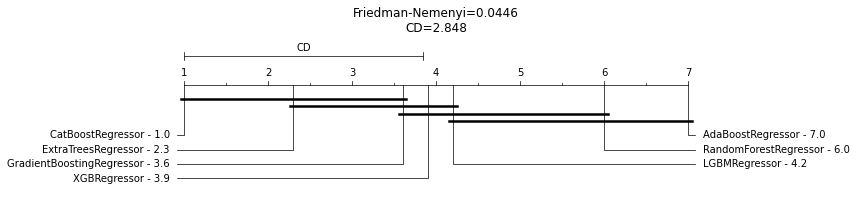

In [100]:
plot_comparisons(fried_result, names, cd, average_ranks)

#### Critical Diagram - Single Regressors  + Voting 

In [101]:
results_data = [single_voting, single_regressors]

single_votingDF = pd.concat(results_data)

In [102]:
names = ['KNeighborsRegressor', 'LinearRegression', 'Ridge', 'LinearSVR', 
         'DecisionTreeRegressor', 'VotingRegressor', 'Lasso']

dct_results = {}

for n in names:
    res = single_votingDF[single_votingDF.name == n].r2.to_list()
    dct_results[n] = res

results = np.c_[dct_results['KNeighborsRegressor'], dct_results['LinearRegression'], dct_results['Ridge'], 
                dct_results['LinearSVR'], dct_results['DecisionTreeRegressor'], 
                dct_results['VotingRegressor'], dct_results['Lasso']]

fried_result, ranks, names, cd, average_ranks = compare_results(results, names)

In [103]:
ranks

array([[7., 2., 3., 6., 5., 1., 4.],
       [7., 2., 3., 6., 5., 1., 4.],
       [7., 2., 3., 6., 5., 1., 4.],
       [7., 2., 3., 6., 5., 1., 4.],
       [7., 2., 3., 6., 5., 1., 4.],
       [7., 2., 3., 6., 5., 1., 4.],
       [7., 2., 3., 6., 5., 1., 4.],
       [7., 2., 3., 6., 5., 1., 4.],
       [7., 2., 3., 6., 5., 1., 4.],
       [7., 2., 3., 6., 5., 1., 4.]])

In [104]:
def plot_comparisons(fried_result, names, cd, average_ranks):    
    # This method generates the plot.
    graph_ranks(average_ranks, names=names,
                        cd=cd, width=10, textspace=1.5)
        
#     plt.title(f'Friedman-Nemenyi < 0.001 \nCD={round(cd, 3)}')
    plt.title(f'Friedman-Nemenyi={round(fried_result.pvalue, 4)}\nCD={round(cd, 3)}')
    plt.show()
    
    return

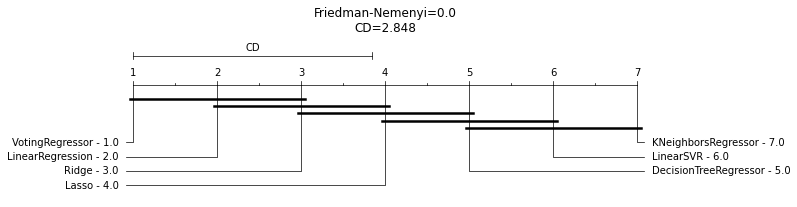

In [105]:
plot_comparisons(fried_result, names, cd, average_ranks)

#### Critical Diagram - Static Regressors  + Voting 

In [113]:
results_data = [static_voting, static_regressors]

static_votingDF = pd.concat(results_data)

In [114]:
names = ['CatBoostRegressor', 'XGBRegressor', 'LGBMRegressor', 'GradientBoostingRegressor', 
         'RandomForestRegressor', 'ExtraTreesRegressor',  'AdaBoostRegressor', 'VotingRegressor']

dct_results = {}

for n in names:
    res = static_votingDF[static_votingDF.name == n].r2.to_list()
    dct_results[n] = res

results = np.c_[dct_results['CatBoostRegressor'], dct_results['XGBRegressor'], dct_results['LGBMRegressor'], 
                dct_results['GradientBoostingRegressor'], dct_results['RandomForestRegressor'], 
                dct_results['ExtraTreesRegressor'], dct_results['AdaBoostRegressor'], dct_results['VotingRegressor']]

fried_result, ranks, names, cd, average_ranks = compare_results(results, names)

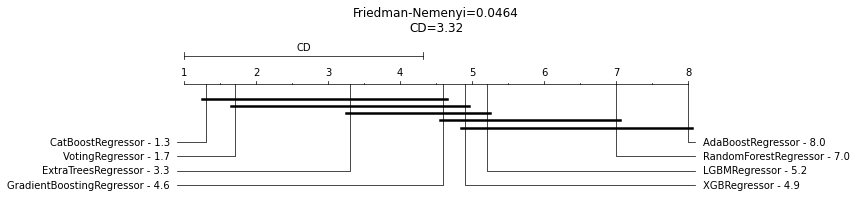

In [115]:
plot_comparisons(fried_result, names, cd, average_ranks)

### Single VS Static 

In [116]:
results_data = [single_regressors, static_regressors]

joinResults = pd.concat(results_data)

In [117]:
names = ['CatBoostRegressor', 'XGBRegressor', 'LGBMRegressor', 'GradientBoostingRegressor', 
         'RandomForestRegressor', 'ExtraTreesRegressor',  'AdaBoostRegressor', 
         'KNeighborsRegressor', 'LinearRegression', 'Ridge', 'DecisionTreeRegressor', 'LinearSVR', 'Lasso'] # 'Lasso'

dct_results = {}

for n in names:
    res = joinResults[joinResults.name == n].r2.to_list()
    dct_results[n] = res

results = np.c_[dct_results['CatBoostRegressor'], dct_results['XGBRegressor'], dct_results['LGBMRegressor'], 
                dct_results['GradientBoostingRegressor'], dct_results['RandomForestRegressor'], 
                dct_results['ExtraTreesRegressor'], dct_results['AdaBoostRegressor'], 
                dct_results['KNeighborsRegressor'], dct_results['LinearRegression'], dct_results['Ridge'], 
                dct_results['LinearSVR'], dct_results['DecisionTreeRegressor'], dct_results['Lasso'] ] #

fried_result, ranks, names, cd, average_ranks = compare_results(results, names)

In [118]:
ranks

array([[ 1.,  5.,  4.,  3.,  6.,  2.,  7., 13.,  8.,  9., 12., 11., 10.],
       [ 1.,  3.,  5.,  4.,  6.,  2.,  7., 13.,  8.,  9., 12., 11., 10.],
       [ 1.,  3.,  5.,  4.,  6.,  2.,  7., 13.,  8.,  9., 12., 11., 10.],
       [ 1.,  4.,  5.,  3.,  6.,  2.,  7., 13.,  8.,  9., 12., 11., 10.],
       [ 1.,  3.,  5.,  4.,  6.,  2.,  7., 13.,  8.,  9., 12., 11., 10.],
       [ 1.,  3.,  4.,  5.,  6.,  2.,  7., 13.,  8.,  9., 12., 11., 10.],
       [ 1.,  4.,  5.,  2.,  6.,  3.,  7., 13.,  8.,  9., 12., 11., 10.],
       [ 1.,  5.,  2.,  3.,  6.,  4.,  7., 13.,  8.,  9., 12., 11., 10.],
       [ 1.,  4.,  3.,  5.,  6.,  2.,  7., 13.,  8.,  9., 12., 11., 10.],
       [ 1.,  5.,  4.,  3.,  6.,  2.,  7., 13.,  8.,  9., 12., 11., 10.]])

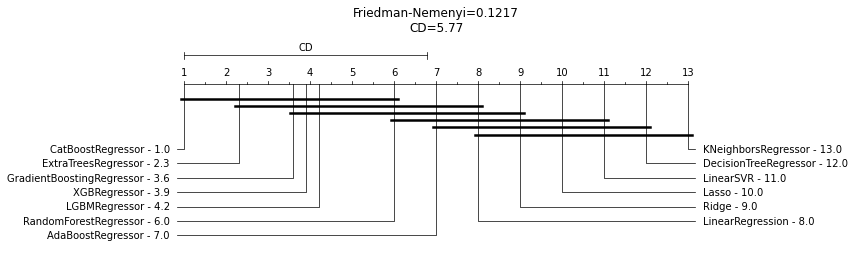

In [119]:
plot_comparisons(fried_result, names, cd, average_ranks)

### <font color='purple'>Bar Chart 

In [32]:
names = ['KNeighborsRegressor', 'LinearRegression', 'LinearSVR', 'DecisionTreeRegressor', 'Ridge', 'Lasso']

rmse_list = [] 
rmse_std = [] 

mae_list = []
mae_std = [] 

r2_list = []
r2_std = [] 

for n in names: 
    rmse_list.append(single_regressors[single_regressors.name == n].rmse.mean())
    rmse_std.append(single_regressors[single_regressors.name == n].rmse.std()*10)
    mae_list.append(single_regressors[single_regressors.name == n].mae.mean())
    mae_std.append(single_regressors[single_regressors.name == n].mae.std()*10)
    r2_list.append(single_regressors[single_regressors.name == n].r2.mean()*100)   
    r2_std.append(single_regressors[single_regressors.name == n].r2.std()*100)

final_results = {"method": names, 
                "rmse": rmse_list, 
                "rmse_std": rmse_std, 
                "mae": mae_list, 
                "mae_std": mae_std, 
                "r2": r2_list, 
                "r2_std": r2_std}

final_resultsDF = pd.DataFrame.from_dict(final_results)

final_resultsDF

,method,rmse,rmse_std,mae,mae_std,r2,r2_std
0,KNeighborsRegressor,18.105065,1.123451,11.742617,0.796975,53.818226,0.571800
1,LinearRegression,14.821622,0.231495,10.827890,0.385076,69.050914,0.096656
2,LinearSVR,16.104270,0.581281,10.779088,0.471449,63.462185,0.264076
3,DecisionTreeRegressor,15.762797,4.409371,10.617599,1.996105,64.971005,1.944796
4,Ridge,14.825556,0.236770,10.827355,0.380286,69.034482,0.098895
5,Lasso,14.865239,0.208209,10.809513,0.359559,68.868508,0.087212


In [33]:
sns.set_style("whitegrid")

In [34]:
final_resultsDF.rename(columns={"method": "Regressors"}, inplace=True)
final_resultsDF.rename(columns={"mae": "MAE", "r2": "R-square", "rmse": "RMSE"}, inplace=True)

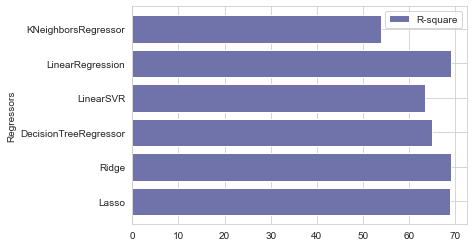

In [35]:
ax = final_resultsDF.plot.barh(x='Regressors', y='R-square', width=0.8, 
                         color=["#7073A9"])
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.invert_yaxis()

### Comparison Single Regressors + Voting 

In [38]:
results_data = [single_voting, single_regressors]

single_votingDF = pd.concat(results_data)

In [39]:
names = ['KNeighborsRegressor', 'LinearRegression', 'LinearSVR', 'DecisionTreeRegressor', 'Ridge', 'VotingRegressor']

rmse_list = [] 
rmse_std = [] 

mae_list = []
mae_std = [] 

r2_list = []
r2_std = [] 

for n in names: 
    rmse_list.append(single_votingDF[single_votingDF.name == n].rmse.mean())
    rmse_std.append(single_votingDF[single_votingDF.name == n].rmse.std()*10)
    mae_list.append(single_votingDF[single_votingDF.name == n].mae.mean())
    mae_std.append(single_votingDF[single_votingDF.name == n].mae.std()*10)
    r2_list.append(single_votingDF[single_votingDF.name == n].r2.mean()*100)   
    r2_std.append(single_votingDF[single_votingDF.name == n].r2.std()*100)

final_results = {"method": names, 
                "rmse": rmse_list, 
                "rmse_std": rmse_std, 
                "mae": mae_list, 
                "mae_std": mae_std, 
                "r2": r2_list, 
                "r2_std": r2_std}

final_resultsDF = pd.DataFrame.from_dict(final_results)

final_resultsDF

,method,rmse,rmse_std,mae,mae_std,r2,r2_std
0,KNeighborsRegressor,18.181459,1.645741,11.783404,0.910952,53.425855,0.844678
1,LinearRegression,14.833310,0.328936,10.820825,0.228785,69.002014,0.137530
2,LinearSVR,16.083386,1.068295,10.801702,0.324779,63.555870,0.484991
3,DecisionTreeRegressor,15.662063,2.990647,10.573037,2.149630,65.430283,1.313393
4,Ridge,14.837569,0.331372,10.819910,0.234646,68.984209,0.138589
5,VotingRegressor,13.935368,1.445145,9.871363,0.449961,72.638853,0.569367


In [40]:
final_resultsDF.rename(columns={"method": "Regressors"}, inplace=True)
final_resultsDF.rename(columns={"mae": "MAE", "r2": "R-square", "rmse": "RMSE"}, inplace=True)

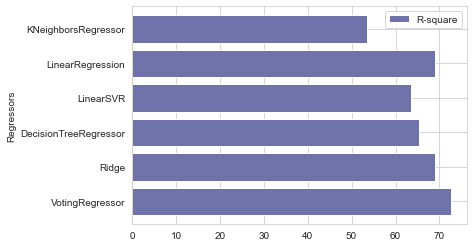

In [41]:
ax = final_resultsDF.plot.barh(x='Regressors', y='R-square', width=0.8, 
                         color=["#7073A9"])
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.invert_yaxis()

### Static Regressors 

In [42]:
names = ['CatBoostRegressor', 'XGBRegressor', 'LGBMRegressor', 'GradientBoostingRegressor', 
         'RandomForestRegressor', 'ExtraTreesRegressor',  'AdaBoostRegressor']

rmse_list = [] 
rmse_std = [] 

mae_list = []
mae_std = [] 

r2_list = []
r2_std = [] 

for n in names: 
    rmse_list.append(static_regressors[static_regressors.name == n].rmse.mean())
    rmse_std.append(static_regressors[static_regressors.name == n].rmse.std()*10)
    mae_list.append(static_regressors[static_regressors.name == n].mae.mean())
    mae_std.append(static_regressors[static_regressors.name == n].mae.std()*10)
    r2_list.append(static_regressors[static_regressors.name == n].r2.mean()*100)   
    r2_std.append(static_regressors[static_regressors.name == n].r2.std()*100)

final_results = {"method": names, 
                "rmse": rmse_list, 
                "rmse_std": rmse_std, 
                "mae": mae_list, 
                "mae_std": mae_std, 
                "r2": r2_list, 
                "r2_std": r2_std}

final_resultsDF = pd.DataFrame.from_dict(final_results)

final_resultsDF

,method,rmse,rmse_std,mae,mae_std,r2,r2_std
0,CatBoostRegressor,12.529144,1.026562,8.525226,0.582376,78.274591,0.355562
1,XGBRegressor,13.015494,1.210117,8.847135,0.741052,76.554794,0.439135
2,LGBMRegressor,13.051810,1.054403,8.888944,0.506644,76.424229,0.381843
3,GradientBoostingRegressor,13.007710,1.189301,8.853492,0.627837,76.582890,0.429535
4,RandomForestRegressor,13.326921,0.909472,8.907006,0.260121,75.420289,0.335614
5,ExtraTreesRegressor,12.920947,0.858966,8.776130,0.457579,76.895056,0.308928
6,AdaBoostRegressor,14.303036,0.864668,10.177755,0.589143,71.688055,0.342220


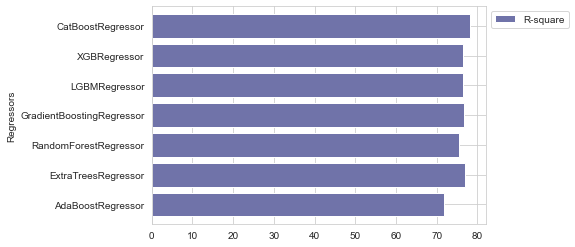

In [43]:
final_resultsDF.rename(columns={"method": "Regressors"}, inplace=True)
final_resultsDF.rename(columns={"mae": "MAE", "r2": "R-square", "rmse": "RMSE"}, inplace=True)

ax = final_resultsDF.plot.barh(x='Regressors', y='R-square', width=0.8, 
                         color=["#7073A9"])
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.invert_yaxis()

### Comparison Stating + Voting 

In [44]:
results_data = [static_voting, static_regressors]

static_votingDF = pd.concat(results_data)

In [45]:
names = ['CatBoostRegressor', 'XGBRegressor', 'LGBMRegressor', 'GradientBoostingRegressor', 
         'RandomForestRegressor', 'ExtraTreesRegressor',  'AdaBoostRegressor', 'VotingRegressor']

rmse_list = [] 
rmse_std = [] 

mae_list = []
mae_std = [] 

r2_list = []
r2_std = [] 

for n in names: 
    rmse_list.append(static_votingDF[static_votingDF.name == n].rmse.mean())
    rmse_std.append(static_votingDF[static_votingDF.name == n].rmse.std()*10)
    mae_list.append(static_votingDF[static_votingDF.name == n].mae.mean())
    mae_std.append(static_votingDF[static_votingDF.name == n].mae.std()*10)
    r2_list.append(static_votingDF[static_votingDF.name == n].r2.mean()*100)   
    r2_std.append(static_votingDF[static_votingDF.name == n].r2.std()*100)

final_results = {"method": names, 
                "rmse": rmse_list, 
                "rmse_std": rmse_std, 
                "mae": mae_list, 
                "mae_std": mae_std, 
                "r2": r2_list, 
                "r2_std": r2_std}

final_resultsDF = pd.DataFrame.from_dict(final_results)

final_resultsDF

,method,rmse,rmse_std,mae,mae_std,r2,r2_std
0,CatBoostRegressor,12.529144,1.026562,8.525226,0.582376,78.274591,0.355562
1,XGBRegressor,13.015494,1.210117,8.847135,0.741052,76.554794,0.439135
2,LGBMRegressor,13.051810,1.054403,8.888944,0.506644,76.424229,0.381843
3,GradientBoostingRegressor,13.007710,1.189301,8.853492,0.627837,76.582890,0.429535
4,RandomForestRegressor,13.326921,0.909472,8.907006,0.260121,75.420289,0.335614
5,ExtraTreesRegressor,12.920947,0.858966,8.776130,0.457579,76.895056,0.308928
6,AdaBoostRegressor,14.303036,0.864668,10.177755,0.589143,71.688055,0.342220
7,VotingRegressor,12.536982,1.160283,8.515305,0.494716,78.247038,0.402104


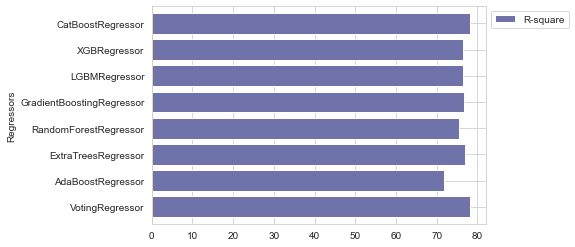

In [46]:
final_resultsDF.rename(columns={"method": "Regressors"}, inplace=True)
final_resultsDF.rename(columns={"mae": "MAE", "r2": "R-square", "rmse": "RMSE"}, inplace=True)

ax = final_resultsDF.plot.barh(x='Regressors', y='R-square', width=0.8, 
                         color=["#7073A9"])
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.invert_yaxis()